In [1]:
%matplotlib widget
%load_ext line_profiler
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from suite2p.blat.behaviour import extract_behaviour

root = '/home/loulou/Documents/Data/Test/place_cells2'

spks = np.load('/'.join((root, 'suite2p/plane0/spks.npy')), allow_pickle=True)
md = np.load('/'.join((root, 'suite2p/plane0/model.npy')), allow_pickle=True)
iscell = np.load('/'.join((root, 'suite2p/plane0/iscell.npy')), allow_pickle=True)
iscell = iscell[:, 0].astype(bool)
spks = spks[iscell, :]

fn = '/home/loulou/Documents/Data/Test/place_cells2/behaviour_00009.h5'
behaviour = extract_behaviour(fn)

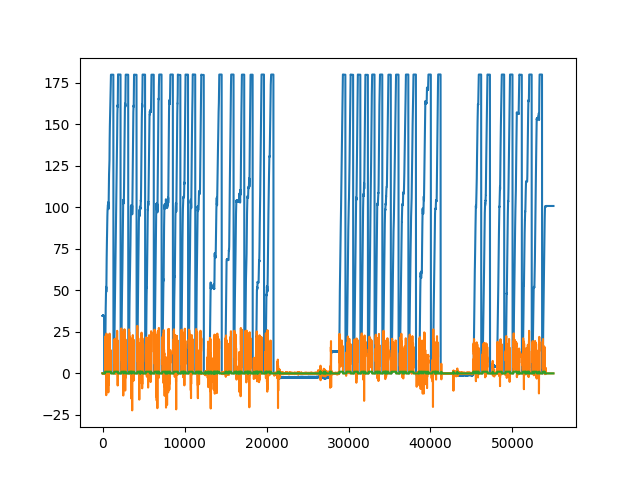

In [13]:
fig = plt.figure()
plt.plot(behaviour['position'])
plt.plot(behaviour['velocity'])
plt.plot(behaviour['movement'])

In [7]:
from suite2p.blat import space

hmap = space.hmaps(behaviour, spks)
stack = hmap['smooth']['stack'].T
rasters = hmap['smooth']['rasters']
stack = (stack - np.min(stack, axis=0)) / np.ptp(stack, axis=0)
order = np.argsort(np.argmax(stack, axis=0))

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
stack = np.mean(rasters[:, :, ::2], axis=2).T
stack = (stack - np.min(stack, axis=0)) / np.ptp(stack, axis=0)
ax[0].imshow(stack[:, order].T)
stack = np.mean(rasters[:, :, 1::2], axis=2).T
stack = (stack - np.min(stack, axis=0)) / np.ptp(stack, axis=0)
ax[1].imshow(stack[:, order].T)

# fig = plt.figure()
# plt.imshow(rasters[9, :, :].T)
# plt.plot(behaviour['position'][behaviour['movement']])

/home/loulou/Documents/GitHub/suite2p/suite2p/blat/space.py:70: RuntimeWarning: invalid value encountered in divide
  rasters = rasters / occ
permutation testing...:   8%|██████▌                                                                         | 41/500 [01:07<12:41,  1.66s/it]


KeyboardInterrupt: 

90


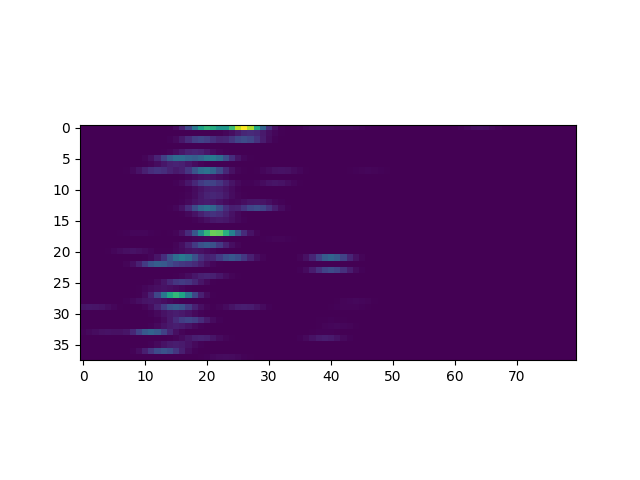

In [4]:
idx = np.argmax(hmap['SI'])
print(idx)
fig = plt.figure()
plt.imshow(hmap['smooth']['rasters'][idx, :, :].T)

In [160]:
from suite2p.blat import utils
from suite2p.blat.KSG import ksg_mi

x = spks
y = behaviour['position']
x = utils.fast_smooth(x, 30, axis=1)
%lprun -f ksg_mi I = ksg_mi(x, y)

print(I)

[0.94780172 1.21119773 1.10254263 1.23082842 1.16914079 1.11895201
 0.42662851 1.31153104 1.18261089 0.89019186 1.40836625 1.24051902
 1.07661756 1.15899601 1.11468446 0.80566321 1.16906915 1.19712828
 1.03578243 1.08876404 1.17651116 0.95544953 0.99965318 1.06521613
 1.24154497 1.11458577 1.02413803 1.30608839 1.30636408 1.08845091
 1.18906747 1.27970446 1.16365361 1.08158821 1.5643854  1.17853893
 1.10937912 1.25754719 1.3948003  1.09165479 1.34506776 1.02575842
 0.93852489 1.11641238 1.43927326 1.03958521 1.20481477 1.520162
 1.21762472 1.10696443 1.31008313 1.09437632 1.21785416 1.267587
 1.18709922 1.22273617 1.21337017 1.51924119 0.58955716 1.13261931
 1.13823436 0.87542006 1.13635117 0.99006299 1.39405343 1.1244089
 1.15189259 1.14167687 1.21272631 1.19001762 1.02473016 1.37127161
 1.1554225  1.18785327 1.22305475 1.51246033 1.43240075 1.01246573
 1.1064324  0.94959824 0.97534225 0.97891244 1.1067477  1.22275756
 0.98967354 1.13053678 1.17697751 0.64448968 1.12285684 1.17220519


Timer unit: 1e-09 s

Total time: 2.72931 s
File: /home/loulou/Documents/GitHub/suite2p/suite2p/blat/KSG.py
Function: ksg_mi at line 17

Line #      Hits         Time  Per Hit   % Time  Line Contents
    17                                           def ksg_mi(x: np.ndarray, y: np.ndarray, k=5) -> np.ndarray:
    18                                               """
    19                                               KSG estimator for mutual information.
    20                                               This is an implementation of the second algorithm
    21                                               as we cannot make assumptions on equality of marginal
    22                                               spaces, especially with calcium data.
    23                                               Units of bits.
    24                                               I did everything to extract every bit of performance T_T
    25                                               """
    26 

In [149]:
print(np.argmax(I))

90


(array([ 1.,  0.,  1.,  1.,  0.,  0.,  3.,  4.,  2., 11., 16., 28., 29.,
        30., 19.,  8.,  8.,  7.,  6.,  5.,  2.,  0.,  2.,  1.,  1.]),
 array([0.42662851, 0.48412419, 0.54161987, 0.59911555, 0.65661123,
        0.71410692, 0.7716026 , 0.82909828, 0.88659396, 0.94408964,
        1.00158532, 1.05908101, 1.11657669, 1.17407237, 1.23156805,
        1.28906373, 1.34655941, 1.40405509, 1.46155078, 1.51904646,
        1.57654214, 1.63403782, 1.6915335 , 1.74902918, 1.80652487,
        1.86402055]),
 <BarContainer object of 25 artists>)

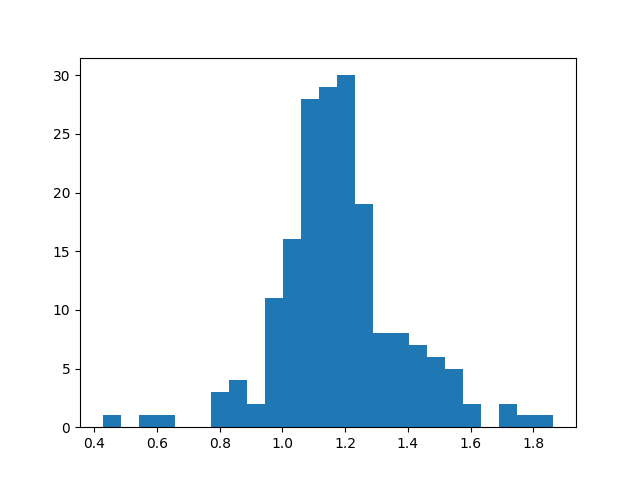

In [150]:
fig = plt.figure()
plt.hist(I, 25)

In [55]:
np.flatnonzero(test[:, 1] == 1)[0]

19